In [43]:
# Problem Statement
'''Make a model to predict wheter the news is fake or not. We will be using NLTK library to perform the same.
We will also be using data cleaning libs such as regex and sklearn.'''

'Make a model to predict wheter the news is fake or not. We will be using NLTK library to perform the same.\nWe will also be using data cleaning libs such as regex and sklearn.'

In [44]:
import pandas as pd
news_df=pd.read_csv('train.csv')
news_df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [45]:
# Removing null values
print(news_df.shape)
news_df=news_df.dropna()

(20800, 5)


In [46]:
news_df.shape #checking if the null values are eliminated

(18285, 5)

In [47]:
# Re-Indexing the dataframe
news_df.reset_index(inplace=True)

In [48]:
# Splitting the dataset into X and Y sets
X=news_df.drop(['label','id'],axis='columns')
Y=news_df['label']

In [49]:
# Data Cleaning and Pre-Processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(len(X)):
    review=re.sub('[^a-zA-Z]', ' ',X['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [50]:
# Applying TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
x=tf.fit_transform(corpus).toarray()

In [51]:
# Splitting into test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=42)

In [52]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape #checking dimensionality correction

((14628, 5000), (3657, 5000), (14628,), (3657,))

In [54]:
# Seeing top feature names
tf.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [55]:
# Viewing our Dataframe
df=pd.DataFrame(X_train,columns=tf.get_feature_names_out())

In [56]:
df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14623,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14624,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14625,0.0,0.0,0.0,0.375111,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14626,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Creating our Model usign PasssiveAggressiveClassifierAlgorithm
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train,Y_train)

PassiveAggressiveClassifier(max_iter=50)

In [60]:
# Run over test data and match prediction accuracy
predictions=pac.predict(X_test)

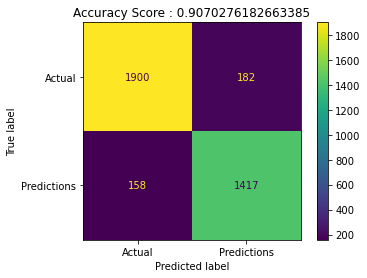

In [65]:
# Making a confusion Matrix and Calculating accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
#to print confusion matrix
import seaborn as sns 
import matplotlib.pyplot as plt
accuracy=accuracy_score(Y_test,predictions)
cm=confusion_matrix(Y_test,predictions)
cm_d=ConfusionMatrixDisplay(cm,display_labels=['Actual','Predictions'])
cm_d.plot()
plt.title(f'Accuracy Score : {accuracy}')
plt.show()
